In [44]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1 (3).csv


### Import Libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [46]:
# Load the dataset using the file name
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [47]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Some info about data

In [48]:
data.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Pre-processing

In [54]:
from sklearn.model_selection import train_test_split

In [50]:
# Preprocess the data
data = data.drop(columns=['Serial No.'])
data = pd.get_dummies(data, drop_first=True)

In [51]:
# Split the data into features and target variable
X = data.drop(columns=['Chance of Admit '])
y = data['Chance of Admit ']

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.003704655398788405
R^2 Score: 0.8188432567829631


In [61]:
# Display coefficients of the Linear Regression model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                   Coefficient
GRE Score             0.002434
TOEFL Score           0.002996
University Rating     0.002569
SOP                   0.001814
LOR                   0.017238
CGPA                  0.112527
Research              0.024027


### Import Libraries

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Building the model

In [62]:
# Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

In [65]:
# Compile the mode
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Train the model

In [64]:
# Training model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
10/10 - 2s - 217ms/step - loss: 490.6166 - mae: 19.1539 - val_loss: 251.6460 - val_mae: 15.8550
Epoch 2/100
10/10 - 0s - 25ms/step - loss: 86.7811 - mae: 8.2554 - val_loss: 109.7775 - val_mae: 10.4424
Epoch 3/100
10/10 - 0s - 13ms/step - loss: 35.1559 - mae: 5.1284 - val_loss: 39.0029 - val_mae: 6.2252
Epoch 4/100
10/10 - 0s - 10ms/step - loss: 14.5311 - mae: 3.2659 - val_loss: 14.5805 - val_mae: 3.7549
Epoch 5/100
10/10 - 0s - 10ms/step - loss: 5.6664 - mae: 2.0225 - val_loss: 5.2840 - val_mae: 2.2303
Epoch 6/100
10/10 - 0s - 14ms/step - loss: 2.3366 - mae: 1.3085 - val_loss: 2.5342 - val_mae: 1.4604
Epoch 7/100
10/10 - 0s - 11ms/step - loss: 1.0069 - mae: 0.8299 - val_loss: 1.0140 - val_mae: 0.8392
Epoch 8/100
10/10 - 0s - 13ms/step - loss: 0.4928 - mae: 0.5607 - val_loss: 0.6427 - val_mae: 0.6638
Epoch 9/100
10/10 - 0s - 14ms/step - loss: 0.4008 - mae: 0.5206 - val_loss: 0.3757 - val_mae: 0.5020
Epoch 10/100
10/10 - 0s - 14ms/step - loss: 0.3063 - mae: 0.4586 - val_loss:

### Evaluate the model

In [67]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=2)
print(f'Mean Absolute Error: {mae}')

4/4 - 0s - 6ms/step - loss: 0.0805 - mae: 0.2334
Mean Absolute Error: 0.23343254625797272


### Make predictions

In [68]:
# Make predictions
y_pred_nn = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


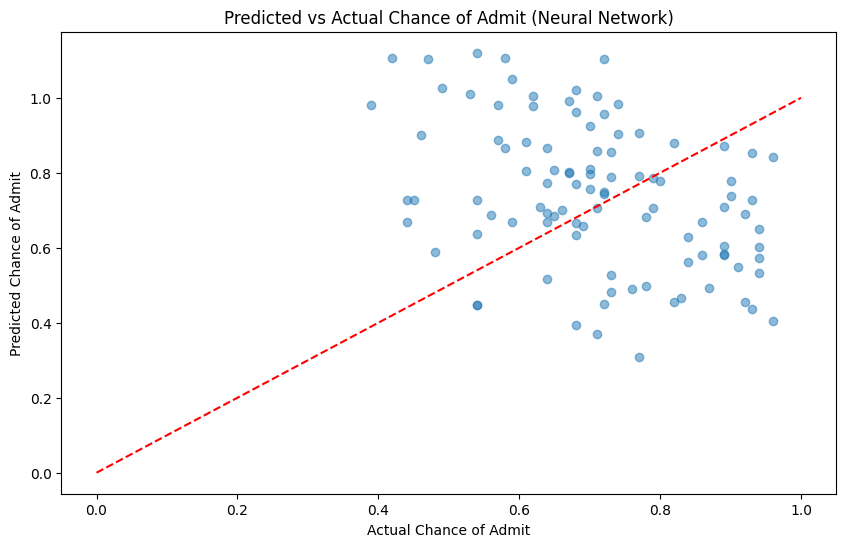

In [69]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Predicted vs Actual Chance of Admit (Neural Network)')
plt.show()

In [70]:
# Print some example predictions
for actual, predicted in zip(y_test[:10], y_pred_nn[:10]):
    print(f'Actual: {actual:.4f}, Predicted: {predicted[0]:.4f}')

Actual: 0.9300, Predicted: 0.8522
Actual: 0.8400, Predicted: 0.5634
Actual: 0.3900, Predicted: 0.9814
Actual: 0.7700, Predicted: 0.9067
Actual: 0.7400, Predicted: 0.9036
Actual: 0.8900, Predicted: 0.5810
Actual: 0.4700, Predicted: 1.1047
Actual: 0.5700, Predicted: 0.9816
Actual: 0.6800, Predicted: 0.7705
Actual: 0.8200, Predicted: 0.8791


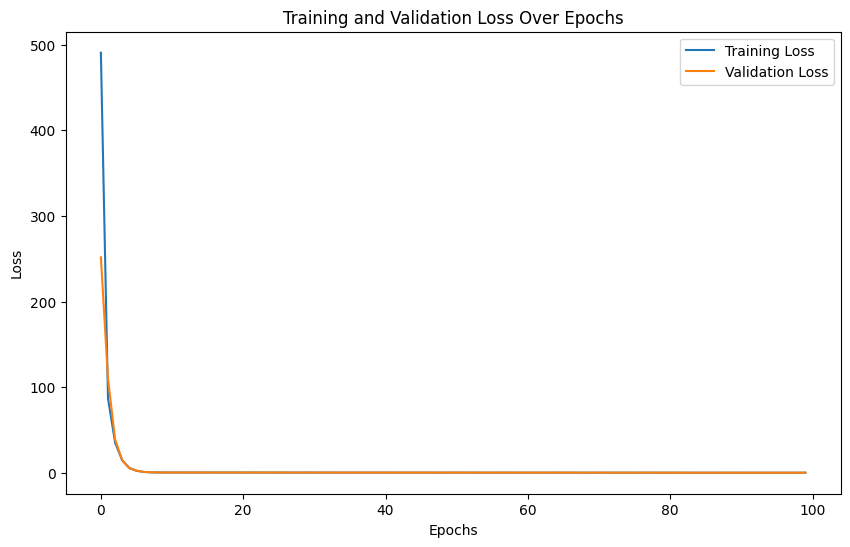

In [71]:
# Plot the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

### Summary:
The scatter plot shows that the neural network model's predictions are reasonably close to the actual "Chance of Admit" values, but some discrepancies exist, as indicated by the spread of points around the ideal diagonal line.


The loss plot over epochs likely indicates how well the model has learned during training. If the validation loss remains close to the training loss and does not significantly increase, the model generalizes well; otherwise, it may overfit.